<a href="https://colab.research.google.com/github/Mercymerine/Pandas-Analysis/blob/main/apple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Apple Stock

### Introduction:

We are going to use Apple's stock price.


### Step 1. Import the necessary libraries

In [3]:
import pandas as pd

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Step 3. Assign it to a variable apple

In [9]:
apple = pd.read_csv('/content/drive/MyDrive/appless.csv')
apple.head()


,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


### Step 4.  Check out the type of the columns

In [5]:
apple.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

### Step 5. Transform the Date column as a datetime type

In [6]:
apple['Date'] = pd.to_datetime(apple['Date'])
apple.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Volume                int64
Adj Close           float64
dtype: object

### Step 6.  Set the date as the index

In [26]:
#apple.set_index('Date', inplace=True)
print(apple.head)

<bound method NDFrame.head of              Open   High    Low  Close     Volume  Adj Close
Date                                                        
2014-07-08  96.27  96.80  93.92  95.35   65130000      95.35
2014-07-07  94.14  95.99  94.10  95.97   56305400      95.97
2014-07-03  93.67  94.10  93.20  94.03   22891800      94.03
2014-07-02  93.87  94.06  93.09  93.48   28420900      93.48
2014-07-01  93.52  94.07  93.13  93.52   38170200      93.52
...           ...    ...    ...    ...        ...        ...
1980-12-18  26.63  26.75  26.63  26.63   18362400       0.41
1980-12-17  25.87  26.00  25.87  25.87   21610400       0.40
1980-12-16  25.37  25.37  25.25  25.25   26432000       0.39
1980-12-15  27.38  27.38  27.25  27.25   43971200       0.42
1980-12-12  28.75  28.87  28.75  28.75  117258400       0.45

[8465 rows x 6 columns]>


In [15]:
apple['Volume']

Date
2014-07-08     65130000
2014-07-07     56305400
2014-07-03     22891800
2014-07-02     28420900
2014-07-01     38170200
                ...    
1980-12-18     18362400
1980-12-17     21610400
1980-12-16     26432000
1980-12-15     43971200
1980-12-12    117258400
Name: Volume, Length: 8465, dtype: int64

### Step 7.  Is there any duplicate dates?

In [28]:
duplicates = apple.index.duplicated().any()
print(duplicates)

False


### Step 8.  Ops...it seems the index is from the most recent date. Make the first entry the oldest date.

In [33]:
apple.sort_index(inplace=True)
apple.tail()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35


### Step 9. Get the last business day of each month

In [49]:
last_business_day = apple.resample('M').apply(lambda x:x.index.max())
print(last_business_day)

                 Open       High        Low      Close     Volume  Adj Close
Date                                                                        
1980-12-31 1980-12-31 1980-12-31 1980-12-31 1980-12-31 1980-12-31 1980-12-31
1981-01-31 1981-01-30 1981-01-30 1981-01-30 1981-01-30 1981-01-30 1981-01-30
1981-02-28 1981-02-27 1981-02-27 1981-02-27 1981-02-27 1981-02-27 1981-02-27
1981-03-31 1981-03-31 1981-03-31 1981-03-31 1981-03-31 1981-03-31 1981-03-31
1981-04-30 1981-04-30 1981-04-30 1981-04-30 1981-04-30 1981-04-30 1981-04-30
...               ...        ...        ...        ...        ...        ...
2014-03-31 2014-03-31 2014-03-31 2014-03-31 2014-03-31 2014-03-31 2014-03-31
2014-04-30 2014-04-30 2014-04-30 2014-04-30 2014-04-30 2014-04-30 2014-04-30
2014-05-31 2014-05-30 2014-05-30 2014-05-30 2014-05-30 2014-05-30 2014-05-30
2014-06-30 2014-06-30 2014-06-30 2014-06-30 2014-06-30 2014-06-30 2014-06-30
2014-07-31 2014-07-08 2014-07-08 2014-07-08 2014-07-08 2014-07-08 2014-07-08

### Step 10.  What is the difference in days between the first day and the oldest

In [40]:
apple.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

In [41]:
apple.index = pd.to_datetime(apple.index)

first_day = apple.index.min()
oldest_day = apple.index.max()

difference = (oldest_day - first_day).days

print(difference)

12261


### Step 11.  How many months in the data we have?

In [42]:
apple.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41


In [43]:
print(apple.index.nunique())

8465


### Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

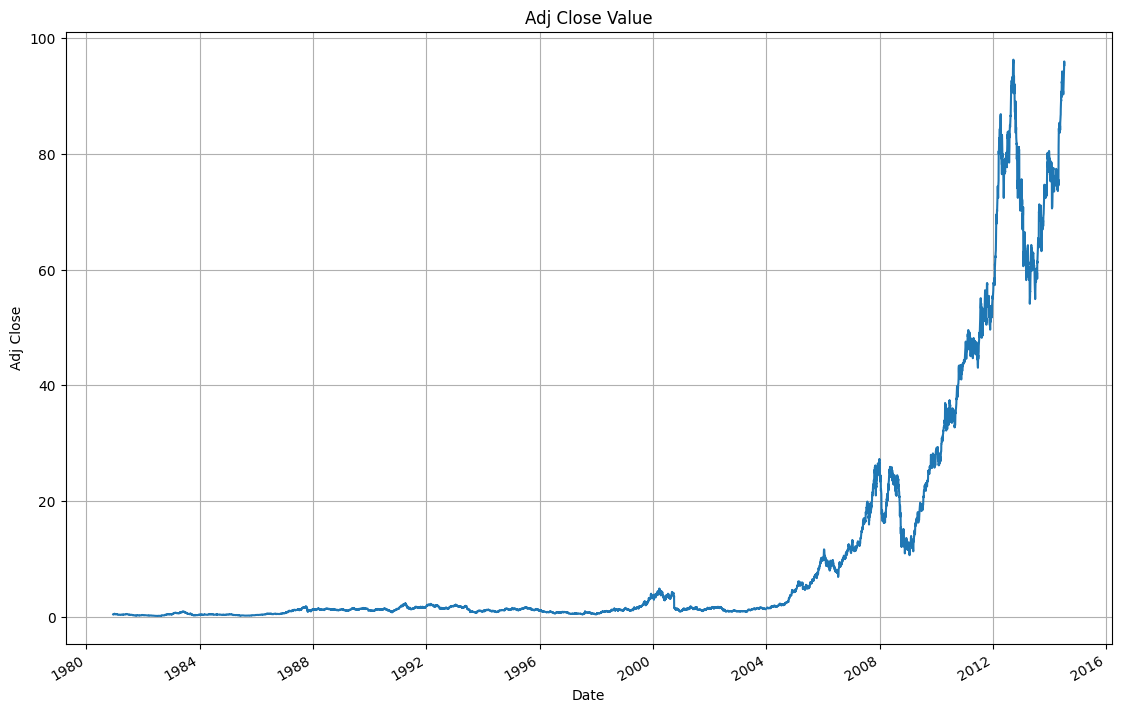

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(13.5, 9))
apple['Adj Close'].plot()
plt.title('Adj Close Value')
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.grid(True)
plt.show()

### BONUS: Create your own question and answer it.

In [47]:
#What is the shape of the dataset?
apple.shape

(8465, 6)